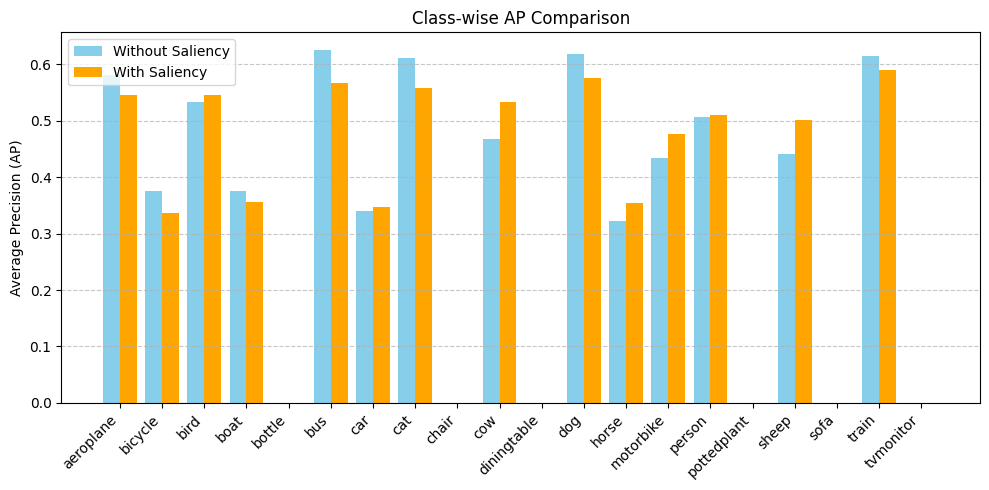

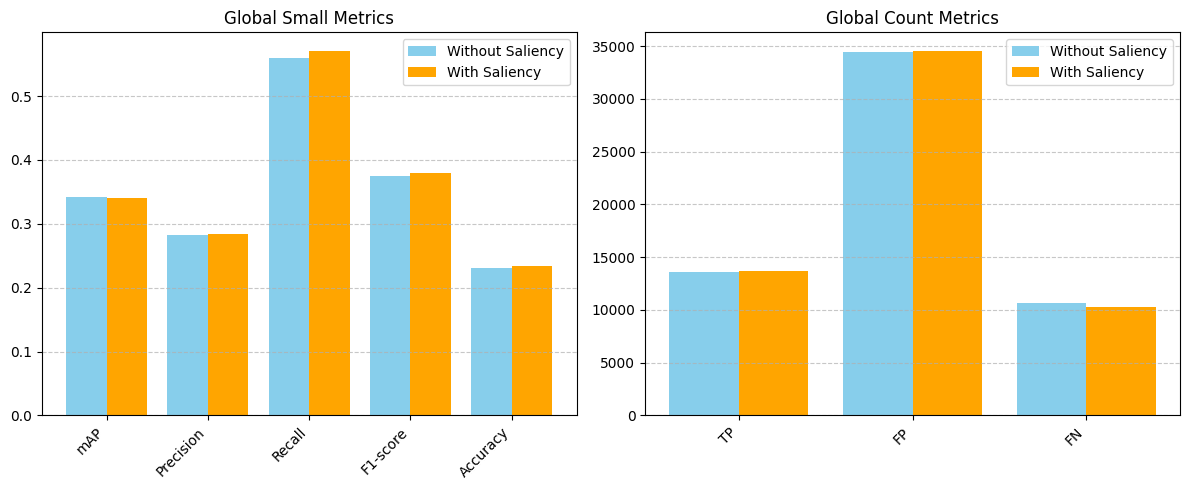

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------------------------
# 1) Define your final results in dictionaries
# -------------------------------------------------------------------------
# Faster R-CNN WITHOUT Saliency
without_saliency_AP = {
    "person": 0.5068,
    "car": 0.3407,
    "sheep": 0.4403,
    "horse": 0.3221,
    "bird": 0.5334,
    "dog": 0.6179,
    "cat": 0.6109,
    "diningtable": 0.0000,
    "boat": 0.3751,
    "sofa": 0.0000,
    "bicycle": 0.3757,
    "train": 0.6155,
    "bus": 0.6256,
    "tvmonitor": 0.0000,
    "pottedplant": 0.0000,
    "motorbike": 0.4338,
    "aeroplane": 0.5810,
    "cow": 0.4678,
    "bottle": 0.0000,
    "chair": 0.0000
}

without_saliency_global = {
    "mAP": 0.3423,
    "Precision": 0.2821,
    "Recall": 0.5599,
    "F1-score": 0.3752,
    "Accuracy": 0.2309,
    "TP": 13558,
    "FP": 34495,
    "FN": 10659
}

# Faster R-CNN WITH Saliency
with_saliency_AP = {
    "aeroplane": 0.5451,
    "person": 0.5112,
    "boat": 0.3564,
    "train": 0.5900,
    "bottle": 0.0000,
    "chair": 0.0000,
    "car": 0.3480,
    "cat": 0.5575,
    "diningtable": 0.0000,
    "motorbike": 0.4765,
    "dog": 0.5767,
    "tvmonitor": 0.0000,
    "bird": 0.5460,
    "horse": 0.3549,
    "bus": 0.5671,
    "bicycle": 0.3358,
    "sheep": 0.5007,
    "cow": 0.5342,
    "sofa": 0.0000,
    "pottedplant": 0.0000
}

with_saliency_global = {
    "mAP": 0.3400,
    "Precision": 0.2839,
    "Recall": 0.5711,
    "F1-score": 0.3792,
    "Accuracy": 0.2340,
    "TP": 13709,
    "FP": 34587,
    "FN": 10295
}

# -------------------------------------------------------------------------
# 2) Class-wise AP Comparison
# -------------------------------------------------------------------------
all_classes = sorted(set(without_saliency_AP.keys()) | set(with_saliency_AP.keys()))
ap_no_sal_list = [without_saliency_AP.get(cls, 0.0) for cls in all_classes]
ap_with_sal_list = [with_saliency_AP.get(cls, 0.0) for cls in all_classes]

bar_width = 0.4
x_indices = np.arange(len(all_classes))

plt.figure(figsize=(10, 5))
plt.bar(x_indices - bar_width/2, ap_no_sal_list, bar_width, label="Without Saliency", color="skyblue")
plt.bar(x_indices + bar_width/2, ap_with_sal_list, bar_width, label="With Saliency", color="orange")

plt.xticks(x_indices, all_classes, rotation=45, ha="right")
plt.ylabel("Average Precision (AP)")
plt.title("Class-wise AP Comparison")
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()

# -------------------------------------------------------------------------
# 3) Global Metrics Comparison
#    We split into two subplots:
#    - Subplot (left) for smaller metrics (mAP, Precision, etc.)
#    - Subplot (right) for large counts (TP, FP, FN)
# -------------------------------------------------------------------------
metrics_small = ["mAP", "Precision", "Recall", "F1-score", "Accuracy"]
metrics_large = ["TP", "FP", "FN"]

vals_no_sal_small = [without_saliency_global[m] for m in metrics_small]
vals_with_sal_small = [with_saliency_global[m] for m in metrics_small]

vals_no_sal_large = [without_saliency_global[m] for m in metrics_large]
vals_with_sal_large = [with_saliency_global[m] for m in metrics_large]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Left subplot: smaller metrics
x_small = np.arange(len(metrics_small))
axes[0].bar(x_small - bar_width/2, vals_no_sal_small, bar_width, 
            label="Without Saliency", color="skyblue")
axes[0].bar(x_small + bar_width/2, vals_with_sal_small, bar_width, 
            label="With Saliency", color="orange")
axes[0].set_xticks(x_small)
axes[0].set_xticklabels(metrics_small, rotation=45, ha="right")
axes[0].set_title("Global Small Metrics")
axes[0].grid(axis="y", linestyle="--", alpha=0.7)
axes[0].legend()

# Right subplot: large counts
x_large = np.arange(len(metrics_large))
axes[1].bar(x_large - bar_width/2, vals_no_sal_large, bar_width, 
            label="Without Saliency", color="skyblue")
axes[1].bar(x_large + bar_width/2, vals_with_sal_large, bar_width, 
            label="With Saliency", color="orange")
axes[1].set_xticks(x_large)
axes[1].set_xticklabels(metrics_large, rotation=45, ha="right")
axes[1].set_title("Global Count Metrics")
axes[1].grid(axis="y", linestyle="--", alpha=0.7)
axes[1].legend()

plt.tight_layout()
plt.show()
